# Базовые этапы предобработки текста

## Токенизация

Это процесс разбиения текста на более мелкие части, такие как слова и предложения.

### Что мы умеем?

Вот рандомный текст:

In [1]:
text = '''Это тренировочный текст,
который я пишу в несколько предложений и даже не в одну строку.
А это его второе предложение, в котором пере-
нос и ашибка. А еще подписывайтесь на www.text.hru 😎 #хештег'''

Разделим его на слова, используя уже известный нам метод `x.split()`.

In [3]:
a = text.split()
a

['Это',
 'тренировочный',
 'текст,',
 'который',
 'я',
 'пишу',
 'в',
 'несколько',
 'предложений',
 'и',
 'даже',
 'не',
 'в',
 'одну',
 'строку.',
 'А',
 'это',
 'его',
 'второе',
 'предложение,',
 'в',
 'котором',
 'пере-',
 'нос',
 'и',
 'ашибка.',
 'А',
 'еще',
 'подписывайтесь',
 'на',
 'www.text.hru',
 '😎',
 '#хештег']

Посмотрим на чатотные слова с помощью метода `Counter(x)`.

In [4]:
from collections import Counter

counter = Counter(a)
counter.most_common()

[('в', 3),
 ('и', 2),
 ('А', 2),
 ('Это', 1),
 ('тренировочный', 1),
 ('текст,', 1),
 ('который', 1),
 ('я', 1),
 ('пишу', 1),
 ('несколько', 1),
 ('предложений', 1),
 ('даже', 1),
 ('не', 1),
 ('одну', 1),
 ('строку.', 1),
 ('это', 1),
 ('его', 1),
 ('второе', 1),
 ('предложение,', 1),
 ('котором', 1),
 ('пере-', 1),
 ('нос', 1),
 ('ашибка.', 1),
 ('еще', 1),
 ('подписывайтесь', 1),
 ('на', 1),
 ('www.text.hru', 1),
 ('😎', 1),
 ('#хештег', 1)]

Что не так с этим списком? 😞

## Ответ

Можно указать сразу несколько недостатков:

*  некоторые слова «склеились» со знаками препинания (`текст,`, `предложение,`, `пере-`, `ашибка.`);
*  одно и то же слово, написанное со строчной и с заглавной буквы, учитывается как два разных слова (`Это` и `это`);
*   разные формы и одного и того же слова засчитываются как два разных слова (`предложений` и `предложение`);
*   за слова принимаются элементы, которыми словами не являются (ссылки, эмодзи, хештеги, слова с орфографическими ошибками).

### NLTK

Разделим текст на слова с помощью библиотеки NLTK.

In [5]:
import nltk # импортируем библиотеку

nltk.download('punkt_tab') # скачиваем модуль для работы с пунктуацией

from nltk.tokenize import word_tokenize # импортируем функцию, которая разбивает строку на слова

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [6]:
b = word_tokenize(text)
b

['Это',
 'тренировочный',
 'текст',
 ',',
 'который',
 'я',
 'пишу',
 'в',
 'несколько',
 'предложений',
 'и',
 'даже',
 'не',
 'в',
 'одну',
 'строку',
 '.',
 'А',
 'это',
 'его',
 'второе',
 'предложение',
 ',',
 'в',
 'котором',
 'пере-',
 'нос',
 'и',
 'ашибка',
 '.',
 'А',
 'еще',
 'подписывайтесь',
 'на',
 'www.text.hru',
 '😎',
 '#',
 'хештег']

Составим частотный список.

In [7]:
counter = Counter(b)
counter.most_common()

[('в', 3),
 (',', 2),
 ('и', 2),
 ('.', 2),
 ('А', 2),
 ('Это', 1),
 ('тренировочный', 1),
 ('текст', 1),
 ('который', 1),
 ('я', 1),
 ('пишу', 1),
 ('несколько', 1),
 ('предложений', 1),
 ('даже', 1),
 ('не', 1),
 ('одну', 1),
 ('строку', 1),
 ('это', 1),
 ('его', 1),
 ('второе', 1),
 ('предложение', 1),
 ('котором', 1),
 ('пере-', 1),
 ('нос', 1),
 ('ашибка', 1),
 ('еще', 1),
 ('подписывайтесь', 1),
 ('на', 1),
 ('www.text.hru', 1),
 ('😎', 1),
 ('#', 1),
 ('хештег', 1)]

Что изменилось по сравнению с методом `split()`?

### spaCy

Сделаем то же самое с помощью библиотеки spaCy.

In [8]:
# скачиваем и импортируем библиотеку
! pip install spacy
import spacy

spaCy работает с разными языками, нам потребуется только русский.

In [9]:
!python -m spacy download ru_core_news_sm

# расскоментируйте, если потребуется английский
# !python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 35.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 30.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('ru_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


Разделим текст на слова.

In [10]:
nlp = spacy.load("ru_core_news_sm")

tokens = []

c = nlp(text)
for i in c:
  tokens.append(i.text)

tokens

['Это',
 'тренировочный',
 'текст',
 ',',
 '\n',
 'который',
 'я',
 'пишу',
 'в',
 'несколько',
 'предложений',
 'и',
 'даже',
 'не',
 'в',
 'одну',
 'строку',
 '.',
 '\n',
 'А',
 'это',
 'его',
 'второе',
 'предложение',
 ',',
 'в',
 'котором',
 'пере-',
 '\n',
 'нос',
 'и',
 'ашибка',
 '.',
 'А',
 'еще',
 'подписывайтесь',
 'на',
 'www.text.hru',
 '😎',
 '#',
 'хештег']

Составим частотный список.

In [11]:
counter = Counter(tokens)
counter.most_common()

[('\n', 3),
 ('в', 3),
 (',', 2),
 ('и', 2),
 ('.', 2),
 ('А', 2),
 ('Это', 1),
 ('тренировочный', 1),
 ('текст', 1),
 ('который', 1),
 ('я', 1),
 ('пишу', 1),
 ('несколько', 1),
 ('предложений', 1),
 ('даже', 1),
 ('не', 1),
 ('одну', 1),
 ('строку', 1),
 ('это', 1),
 ('его', 1),
 ('второе', 1),
 ('предложение', 1),
 ('котором', 1),
 ('пере-', 1),
 ('нос', 1),
 ('ашибка', 1),
 ('еще', 1),
 ('подписывайтесь', 1),
 ('на', 1),
 ('www.text.hru', 1),
 ('😎', 1),
 ('#', 1),
 ('хештег', 1)]

Чем данный список отличается от других? ☝

Даже после исправления пунктуации список всё равно выглядит далеко не безупречно.

## Предобработка текста

Удалим из текста все, что нам мешает, но часто встречается в постах и комментах:


*   заглавные буквы (в том числе капс),
*   знаки препинания,
*   цифры,
*   ссылки,
*   хештеги,
*   эмодзи.

Вот наш текст:

In [12]:
text = '''Это тренировочный текст,
который я пишу в несколько предложений и даже не в одну строку.
А это его второе предложение, в котором пере-
нос и ашибка. А еще подписывайтесь на www.text.hru 😎 #хештег'''

Приведем его к нижнему регистру.

In [13]:
text = text.lower()
text

'это тренировочный текст,\nкоторый я пишу в несколько предложений и даже не в одну строку.\nа это его второе предложение, в котором пере-\nнос и ашибка. а еще подписывайтесь на www.text.hru 😎 #хештег'

Удалим ссылки и посторонние символы, оставим только слова. <p> Для этого нам потребуются регулярные выражения.



In [14]:
import re # импортируем модуль для работы с регулярными выражениями



text = re.sub(r'https?://\S+|www\.\S+', '', text) # удаляем ссылки
text = re.sub(r'#\S+', '', text) # удаляем хештеги
text = re.sub(r'(?<=\w)-\s*(?=\w)', '', text) # удаляем переносы
text = re.sub('[^a-zа-я]+', ' ', text) # оставляем только слова

Посмотрим на то, что у нас получилось.

In [15]:
text

'это тренировочный текст который я пишу в несколько предложений и даже не в одну строку а это его второе предложение в котором перенос и ашибка а еще подписывайтесь на '

Разделите данный текст на слова (любым методом) и составьте частотный список.

In [ ]:
# напишите код

## Лемматизация

Лемматизация — это процесс приведения слов к их словарной форме. Она необходима для того, чтобы разные грамматические формы одного и того же слова не учитывались как разные слова. Для выполнения этой задачи нам понадобится библиотека pymorphy3.

Установим ее:

In [16]:
! pip install pymorphy3

Импортируем ее в наш код и подключим анализатор.

In [17]:
import pymorphy3

from pymorphy3 import MorphAnalyzer
analyzer = MorphAnalyzer()

Посмотрим, как это работает на примере одного слова. Пусть это будет слово `предложений`.

In [18]:
analyzer.parse('предложений')

[Parse(word='предложений', tag=OpencorporaTag('NOUN,inan,neut plur,gent'), normal_form='предложение', score=1.0, methods_stack=((DictionaryAnalyzer(), 'предложений', 77, 15),))]

Перед нами список, в котором указаны морфологические признаки слова (`NOUN` — существительное, `inan` — неодушевленное...), его словарная форма и вероятность. <p>

Подробнее об обозначениях можно прочитать [здесь](https://pymorphy2.readthedocs.io/en/stable/user/grammemes.html).

Сравним со словом `предложение`.

In [19]:
analyzer.parse('предложение') # Обратите внимание на два варианта разбора, но первым всегда будет идти наиболее вероятный

[Parse(word='предложение', tag=OpencorporaTag('NOUN,inan,neut sing,accs'), normal_form='предложение', score=0.531914, methods_stack=((DictionaryAnalyzer(), 'предложение', 77, 6),)),
 Parse(word='предложение', tag=OpencorporaTag('NOUN,inan,neut sing,nomn'), normal_form='предложение', score=0.468085, methods_stack=((DictionaryAnalyzer(), 'предложение', 77, 0),))]

Убедимся, что морфологические признаки у этих двух слов разные, а словарная форма одинаковая.

In [20]:
analyzer.parse('предложений')[0].normal_form == analyzer.parse('предложение')[0].normal_form

True

Придумайте любое несуществующее слово (например, `звукотень`) и посмотрите на его разбор.

In [ ]:
# напишите код

Теперь проведём лемматизацию нашего предобработанного текста.

In [21]:
lemmas = [] # создадим пустой список, в который будем складывать слова
for i in text.split():
    lemmas.append(analyzer.parse(i)[0].normal_form)
lemmas

['это',
 'тренировочный',
 'текст',
 'который',
 'я',
 'писать',
 'в',
 'несколько',
 'предложение',
 'и',
 'даже',
 'не',
 'в',
 'один',
 'строка',
 'а',
 'это',
 'он',
 'второе',
 'предложение',
 'в',
 'который',
 'перенос',
 'и',
 'ашибкий',
 'а',
 'ещё',
 'подписываться',
 'на']

Составим частотный список.

In [22]:
counter = Counter(lemmas)
counter.most_common()

[('в', 3),
 ('это', 2),
 ('который', 2),
 ('предложение', 2),
 ('и', 2),
 ('а', 2),
 ('тренировочный', 1),
 ('текст', 1),
 ('я', 1),
 ('писать', 1),
 ('несколько', 1),
 ('даже', 1),
 ('не', 1),
 ('один', 1),
 ('строка', 1),
 ('он', 1),
 ('второе', 1),
 ('перенос', 1),
 ('ашибкий', 1),
 ('ещё', 1),
 ('подписываться', 1),
 ('на', 1)]

### Небольшая практика

Возьмите [отсюда](https://tabiturient.ru/vuzu/hse/) отзыв о Вышке (с этим текстом мы будем работать и дальше) и составьте частотный список слов, предварительно нормализовав текст, разделив его на токены и проведя лемматизацию.

In [ ]:
# напишите код

Почему данный частотный список нельзя назвать репрезентативным?

## Стоп-слова

Если коротко:

* самые частотные слова в конкретном языке,
* мешают получить данные о частотных словах в конкретном тексте,
* их нужно удалять.

In [23]:
nltk.download('stopwords')

from nltk.corpus import stopwords
nltk_stopwords = stopwords.words('russian')
nltk_stopwords_eng = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Посмотрим на стоп-слова русского языка:

In [24]:
nltk_stopwords[:30]

['и',
 'в',
 'во',
 'не',
 'что',
 'он',
 'на',
 'я',
 'с',
 'со',
 'как',
 'а',
 'то',
 'все',
 'она',
 'так',
 'его',
 'но',
 'да',
 'ты',
 'к',
 'у',
 'же',
 'вы',
 'за',
 'бы',
 'по',
 'только',
 'ее',
 'мне']

А теперь для английского:

In [25]:
nltk_stopwords_eng[:30]

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't"]

Удалим из нашего списка `lemmas` стоп-слова:

In [28]:
lemmas_filtered = []

for i in lemmas:
  if i not in nltk_stopwords:
    lemmas_filtered.append(i)

lemmas_filtered


['тренировочный',
 'текст',
 'который',
 'писать',
 'несколько',
 'предложение',
 'строка',
 'второе',
 'предложение',
 'который',
 'перенос',
 'ашибкий',
 'ещё',
 'подписываться']

Добавим в список стоп-слов еще что-то:

In [27]:
nltk_stopwords.append('это')

Запустим предыдущий код еще раз.

### Небольшая практика

Удалите из частотного списка, составленного на материале отзыва, стоп-слова.

In [ ]:
# напишите код

## Облако слов

Визуализируем наш частотный список через облако слов.

Для начала скачаем библиотеку для визуализаций.

In [29]:
! pip install matplotlib
import matplotlib.pyplot as plt

`WordCloud` работает со строками, поэтому переделываем наш список в строку.

In [30]:
text_data = ' '.join(lemmas_filtered)

А теперь нарисуем:

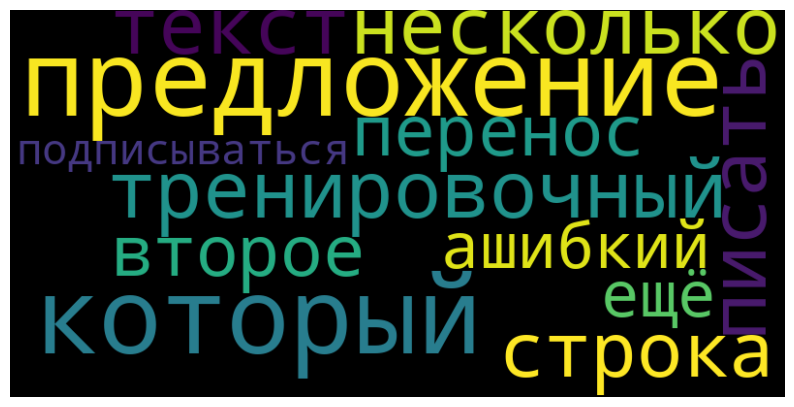

In [31]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110).generate(text_data)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Посмотрим на несуществующее слово `ашибкий`, посмеемся, но ничего с этим не сделаем... пока...

### Небольшая практика

Составьте облако слов по вашему отзыву.

In [ ]:
# напишите код